<a href="https://colab.research.google.com/github/shrinidhisuresha/ML-and-AI-Practice/blob/master/KaggelTitanicML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Import python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import files
uploaded=files.upload()

In [0]:
df = pd.read_csv("https://query.data.world/s/gb5wjsz5c76sgfyeas22h4loq7syqt")

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
print(df['Age'].isna().value_counts())
print(df.info())

False    714
True     177
Name: Age, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [12]:
df['Embarked'].isna().value_counts()/len(df)

False    0.997755
True     0.002245
Name: Embarked, dtype: float64

In [15]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [25]:
mask1=df['Sex']=='female'
mask2=df['Survived']==1
len(df[mask1 & mask2])/len(df)

0.2615039281705948

In [28]:
pd.crosstab(df.Survived,df.Sex,normalize=True)

Sex,female,male
Survived,,
0,0.090909,0.525253
1,0.261504,0.122334


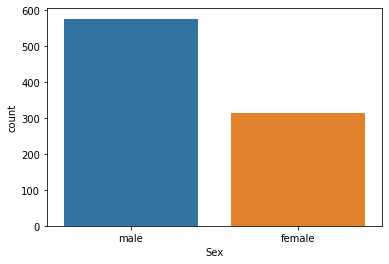

In [30]:
sns.countplot('Sex',data=df)

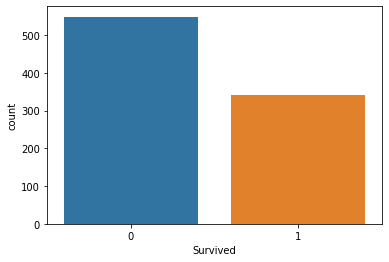

In [31]:
sns.countplot('Survived',data=df)

In [32]:
pd.crosstab(df.Survived,df.Age)

Age,0.42,0.67,0.75,0.83,0.92,1.00,2.00,3.00,4.00,5.00,6.00,7.00,8.00,9.00,10.00,11.00,12.00,13.00,14.00,14.50,15.00,16.00,17.00,18.00,19.00,20.00,20.50,21.00,22.00,23.00,23.50,24.00,24.50,25.00,26.00,27.00,28.00,28.50,29.00,30.00,...,36.00,36.50,37.00,38.00,39.00,40.00,40.50,41.00,42.00,43.00,44.00,45.00,45.50,46.00,47.00,48.00,49.00,50.00,51.00,52.00,53.00,54.00,55.00,55.50,56.00,57.00,58.00,59.00,60.00,61.00,62.00,63.00,64.00,65.00,66.00,70.00,70.50,71.00,74.00,80.00
Survived,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,2,7,1,3,0,1,2,2,6,2,3,0,0,3,1,1,11,7,17,16,12,1,19,16,10,1,15,1,17,12,7,18,2,12,15,...,11,1,5,6,9,7,2,4,7,4,6,7,2,3,8,3,2,5,5,3,0,5,1,1,2,2,2,2,2,3,2,0,2,3,1,2,1,2,1,0
1,1,1,2,2,1,5,3,5,7,4,2,1,2,2,0,1,1,2,3,0,4,6,6,9,9,3,0,5,11,5,0,15,0,6,6,11,7,0,8,10,...,11,0,1,5,5,6,0,2,6,1,3,5,0,0,1,6,4,5,2,3,1,3,1,0,2,0,3,0,2,0,2,2,0,0,0,0,0,0,0,1


In [42]:
df['bin'] = pd.cut(df['Age'], [0,16, 32, 48,64,100])
df['bin'].value_counts()/len(df)

(16, 32]     0.388328
(32, 48]     0.210999
(0, 16]      0.112233
(48, 64]     0.077441
(64, 100]    0.012346
Name: bin, dtype: float64

In [0]:
sec1=df[df['Age']<=16]
mask1=df['Age']>16
mask2=df['Age']<=32
sec2=df[mask1 & mask2]
mask1=df['Age']>32
mask2=df['Age']<=48
sec3=df[mask1 & mask2]
mask1=df['Age']>48
mask2=df['Age']<=64
sec4=df[mask1 & mask2]
mask1=df['Age']>48
mask2=df['Age']>64
sec4=df[mask2]
#sec4=df[df['Age']>48 & df['Age']<=64]
#sec5=df[df['Age']>64]

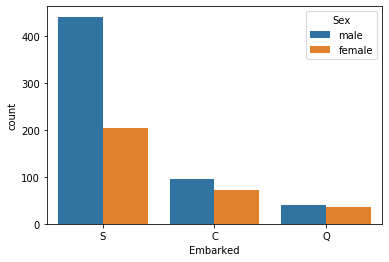

In [50]:
sns.countplot("Embarked",hue=df.Sex,data=df)

In [0]:
df['Embarked']=df['Embarked'].fillna('S')

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
bin            714 non-null category
dtypes: category(1), float64(2), int64(5), object(5)
memory usage: 84.8+ KB


In [0]:
df.drop('bin',inplace=True,axis=1)

In [0]:
df.drop('Cabin',inplace=True,axis=1)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [0]:
df.drop(['PassengerId','Name','Ticket'],inplace=True,axis=1)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    891 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [62]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [0]:
df['Sex'].replace(['female','male'],[0,1],inplace=True)

In [64]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [0]:
# Label encoder
from sklearn import preprocessing 
le = preprocessing.LabelEncoder()
df['Embarked']=le.fit_transform(df['Embarked'])

In [66]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [0]:
#iterative imputer 
from fancyimpute import IterativeImputer

In [0]:
df_cols = df.columns

In [89]:
IterativeImputer().fit_transform(df)

array([[ 0.    ,  3.    ,  1.    , ...,  0.    ,  7.25  ,  2.    ],
       [ 1.    ,  1.    ,  0.    , ...,  0.    , 71.2833,  0.    ],
       [ 1.    ,  3.    ,  0.    , ...,  0.    ,  7.925 ,  2.    ],
       ...,
       [ 0.    ,  3.    ,  0.    , ...,  2.    , 23.45  ,  2.    ],
       [ 1.    ,  1.    ,  1.    , ...,  0.    , 30.    ,  0.    ],
       [ 0.    ,  3.    ,  1.    , ...,  0.    ,  7.75  ,  1.    ]])

In [0]:
df_clean=pd.DataFrame(IterativeImputer().fit_transform(df),columns=df_cols)

In [0]:
df_clean.columns=df_cols

In [91]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int64
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    891 non-null int64
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


In [84]:
df_clean.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,3.0,1.0,22.0,1.0,0.0,7.2500,2.0
1,1.0,1.0,0.0,38.0,1.0,0.0,71.2833,0.0
2,1.0,3.0,0.0,26.0,0.0,0.0,7.9250,2.0
3,1.0,1.0,0.0,35.0,1.0,0.0,53.1000,2.0
4,0.0,3.0,1.0,35.0,0.0,0.0,8.0500,2.0


In [85]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [86]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [0]:
for i in ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']:
  df_clean[i]=pd.to_numeric(df_clean[i])
  df_clean[i]=df_clean[i].astype(int)

In [88]:
df_clean.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
